# NASA AI: Radiation Exposure Prediction for Astronauts

Group: AnM
1. Maira Tanweer Chachar
2. Ahad Maredia

## Description:
Build an AI to predict radiation exposure levels for astronauts based on numerical data from space weather (e.g., solar activity, cosmic ray flux).
## Data:
Use NASA’s space weather datasets or simulated radiation measurements.
## AI Approach:
1. Use Neural Network
2. Use regression models (e.g., Linear Regression, XGBoost) to predict radiation levels from input variables like solar flare intensity.

## Output:
Numerical radiation dose predictions and safety thresholds.

## Set-Up Instructions:
1. Default Google Colab settings
2. Min 8GB Ram required

## Reading The DataSet

In [4]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Dataset
df= pd.read_csv("DataSet1.csv")

## Data Cleaning

In [6]:
# Removing rows with null values
df.dropna(inplace=True)


In [7]:
# Outlier Removal
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

In [8]:
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
df_clean = remove_outliers_iqr(df.copy(), numerical_cols)

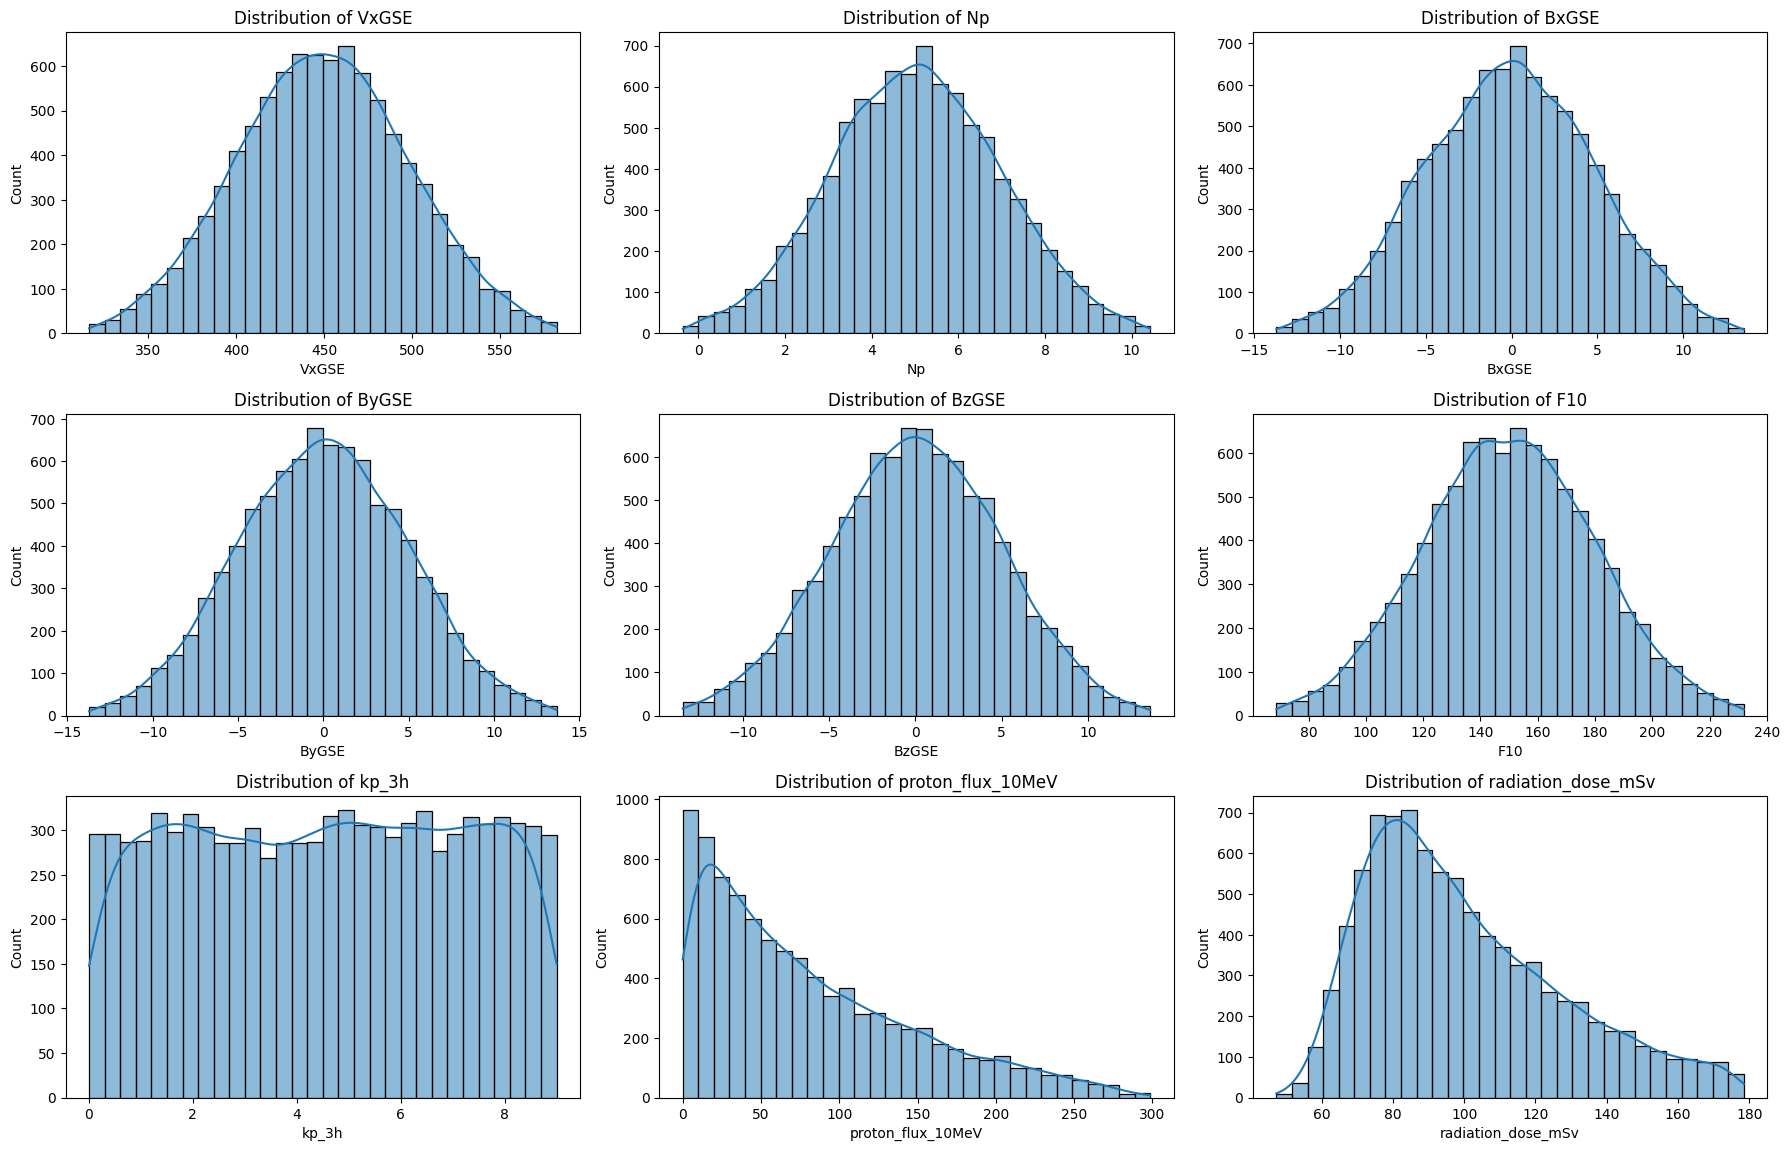

In [9]:
#Distribution
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df_clean[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [10]:
# Normalising Dataset
scaler = MinMaxScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

In [11]:
# Save Cleaned Data
df_clean.to_excel("Cleaned_Data.xlsx", index=False)

In [12]:
df=df_clean

In [13]:
df = pd.read_excel("Cleaned_Data.xlsx")

## Model/s

In [14]:
# Libraries and Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [15]:
X = df.drop(columns=["radiation_dose_mSv"])
y = df["radiation_dose_mSv"]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Neural Network

In [17]:
#Scale input features
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)



In [18]:
#Scale target variable (optional but helpful if target values are large)
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.to_numpy().reshape(-1, 1)).flatten()

In [19]:
#Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),  # helps prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # regression output
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

In [21]:
# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [22]:
# Train the model
history = model.fit(
    X_train_scaled,
    y_train_scaled,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0462 - val_loss: 0.0062
Epoch 2/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0112 - val_loss: 0.0049
Epoch 3/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0068 - val_loss: 0.0029
Epoch 4/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0052 - val_loss: 0.0022
Epoch 5/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0042 - val_loss: 0.0022
Epoch 6/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0037 - val_loss: 0.0020
Epoch 7/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0037 - val_loss: 0.0020
Epoch 8/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 9/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 10/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 11/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 12/200
180/180 ━━━━━━━━━━━━━━━━━━━

In [23]:
# Predict and inverse transform
preds_scaled = model.predict(X_test_scaled).flatten()
preds = y_scaler.inverse_transform(preds_scaled.reshape(-1, 1)).flatten()


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [24]:
# Evaluation
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"Neural Network: MSE = {mse:.2f}, R2 = {r2:.4f}")

Neural Network: MSE = 0.00, R2 = 0.9623


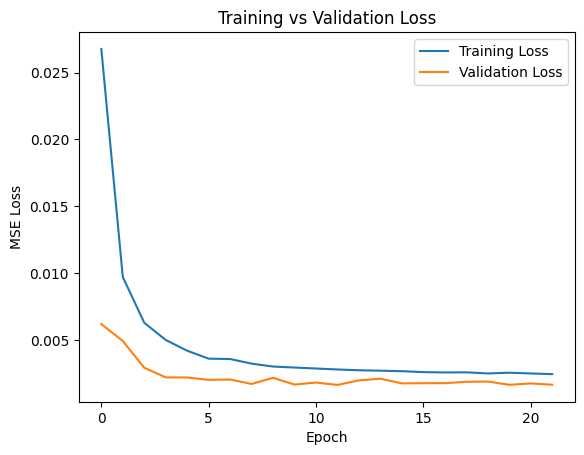

In [25]:
# Plotting Loss Function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

## Regression Models

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Bayesian Ridge": BayesianRidge(),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

In [27]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{name}: MSE = {mse:.2f}, R2 = {r2:.4f}")

Linear Regression: MSE = 0.00, R2 = 0.9649
Ridge Regression: MSE = 0.00, R2 = 0.9650
Lasso Regression: MSE = 0.04, R2 = -0.0000
Random Forest: MSE = 0.00, R2 = 0.9616
Bayesian Ridge: MSE = 0.00, R2 = 0.9649
XGBoost: MSE = 0.00, R2 = 0.9592
